# US Guns Deaths
The data comes from [FiveThirtyEight](https://github.com/fivethirtyeight/guns-data).

# Introduction

In [23]:
#import lib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [24]:
#open the csv file
guns = pd.read_csv("full_data.csv")

In [25]:
#print the first few rows
guns.iloc[0:10,:]

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,1.0
6,7,2012,2,Undetermined,0,M,48.0,White,100,Home,2.0
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,2.0
8,9,2012,2,Accidental,0,M,50.0,White,100,Other specified,3.0
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,5.0


In [26]:
#################################################################
# Function to gen a graph 
# - data = the pandas.datastream
# - col = colums name
# - annotation = "middle" or "top" to see the value on top of the bar or in the middle of the bar 
# - rot = 0 to 90 for the rotation level of the ticklabels
#################################################################
def MakeMyGraph(data, col, annotation="middle", hue=None, addtop=0, rot=0, ymax=0, **parg):
    # Global Style
    sns.set(style="white")

    #gen the plot
    ax = sns.countplot(x=col, hue=hue, data=data, **parg)

    #handling annotation
    if annotation == "middle":
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, int(p.get_height()), color="w", fontweight="bold", ha="center", va="center")
            if ymax < p.get_height():
                ymax = p.get_height()
    elif annotation == "top":
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+addtop, int(p.get_height()), color="black", ha="center", va="center")
            if ymax < p.get_height():
                ymax = p.get_height()
    else:
        print("Error A : bad annotation parameter")
    
    #settings
    ax.tick_params(bottom="off", top="off", left="off", right="off") #Hiding Tick Marks
    ax.set_yticks([0,int(ymax)]) #show only the extreme value
    ax.set_ylabel("") #hiding the "count" label
    for t in ax.get_xticklabels():
        t.set(rotation=rot)
    sns.despine(left=True, bottom=True) #hiding axes left/right/top/bottom
    
    #affiche le graph
    plt.show()


# Gun Deaths by Year

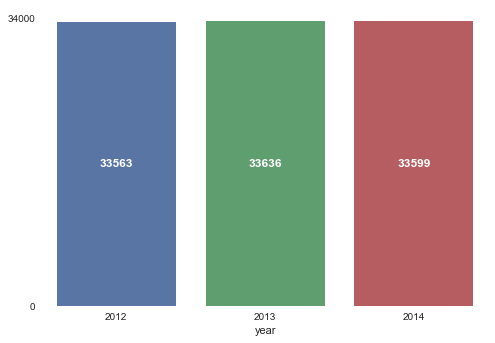

In [27]:
MakeMyGraph(data=guns, col="year", annotation="middle", rot=0, ymax=34000)

Deaths by guns is pretty stable over the years.

# Gun Deaths by Year and Month

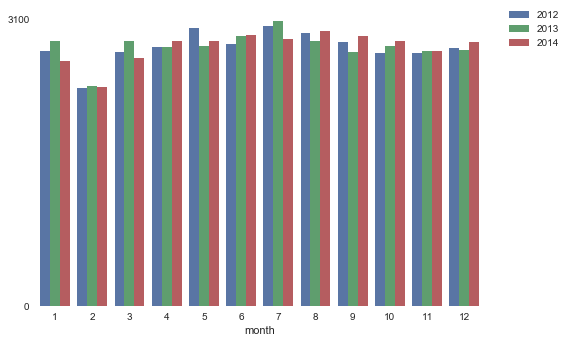

In [28]:
#set sns style
sns.set(style="white")

#gen the plot
ax = sns.countplot(x="month", hue="year", data=guns)

ax.tick_params(bottom="off", top="off", left="off", right="off") #Hiding Tick Marks
ax.set_yticks([0,3100]) #show only the extreme value
ax.set_ylabel("") #hiding the "count" label

sns.despine(left=True, bottom=True) #hiding axes left/right/top/bottom
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#print the graph
plt.show()

We can see a minor seasonal correlation, with gun deaths peaking in the summer and declining in the winter. 

# Guns Deaths By Race And Sex

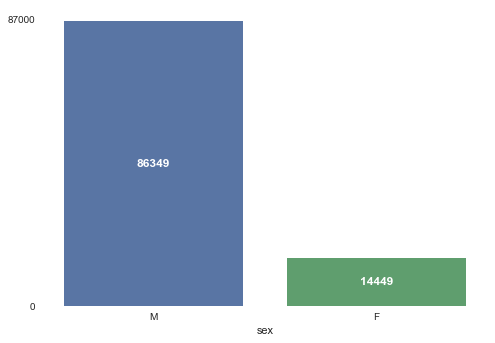

In [29]:
MakeMyGraph(data=guns, col="sex", annotation="middle", rot=0, ymax=87000)

As might be supposed, men are much more represented.

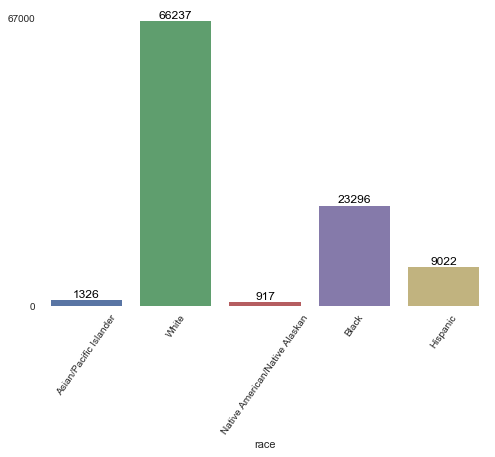

In [30]:
MakeMyGraph(data=guns, col="race", annotation="top", addtop=1300, rot=55, ymax=67000)

Without the structure of the population we can say nothing really relevant.

# Structure of the US population
    We will add the 2010 census data to continue the analysis. 

In [31]:
# Open the data
census = pd.read_csv("census.csv")
# Quick view
census.iloc[:,:]

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


In [32]:
# extract the col we need
new_census = census.iloc[:,10:14]
# Data preprocessing
# Asian/Pacific Islander = Asian + Native Hawaiian and Other Pacific Islander
new_census["Asian/Pacific Islander"] = census["Race Alone - Asian"] + census["Race Alone - Native Hawaiian and Other Pacific Islander"]
new_census.iloc[:,:]

# renaming the col
mapping = {
    "Race Alone - White" : "White",
    "Race Alone - Hispanic" : "Hispanic",
    "Race Alone - Black or African American" : "Black",
    "Race Alone - American Indian and Alaska Native" : "Native American/Native Alaskan"
}
new_census.rename(columns=mapping, inplace=True)
new_census.iloc[:,:]

,White,Hispanic,Black,Native American/Native Alaskan,Asian/Pacific Islander
0,197318956,44618105,40250635,3739506,15834141


In [33]:
# Guns Deaths By Race
race_counts = guns["race"].value_counts()
print(race_counts)

White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: race, dtype: int64


# Guns Deaths Rate By Race 

In [34]:
# Total Guns Deaths By Race 
rate_per_hundredk = (race_counts / new_census) * 100000

In [35]:
# Printing the result
rate_per_hundredk.iloc[:,:]

,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
0,8.37431,57.877348,20.220491,24.521956,33.568493


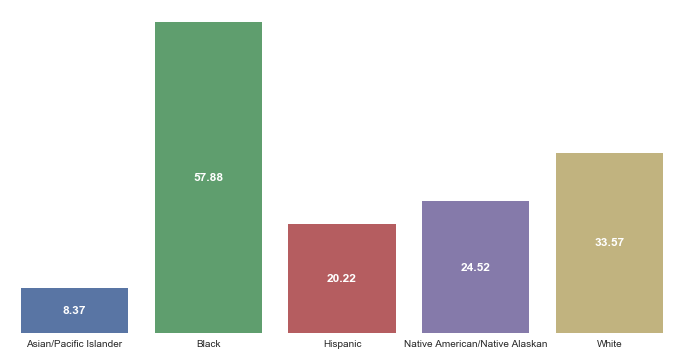

In [36]:
# Plotting the result
sns.set(style="white") #style
x = rate_per_hundredk.T[0].index
y = rate_per_hundredk.T[0].values

fig, ax = plt.subplots(figsize=(12,6)) #set the size of the figure

rect = sns.barplot(x, y) #barplot

#gestion des annotations 
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, round(p.get_height(), 2), color="w", fontweight="bold", ha="center", va="center")

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_yticks([])
ax.set_ylabel("")

sns.despine(left=True, bottom=True)

plt.show()

It seems that an ethnic bias exists. Interesting to see the high rate for the white, we need to investigate that.

# Filter by intent
    Focusing on Homicide

In [37]:
# Filter by Homicide
homicide = guns[guns["intent"] == "Homicide"]
# Homicide by etnie
homicide_race_counts = homicide["race"].value_counts()
# Computing the Gun Homicide rate
homicide_rate_per_hundredk = (homicide_race_counts / new_census) * 100000
# Printing the result
homicide_rate_per_hundredk.iloc[:,:]

,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
0,3.530346,48.471285,12.627161,8.717729,4.635642


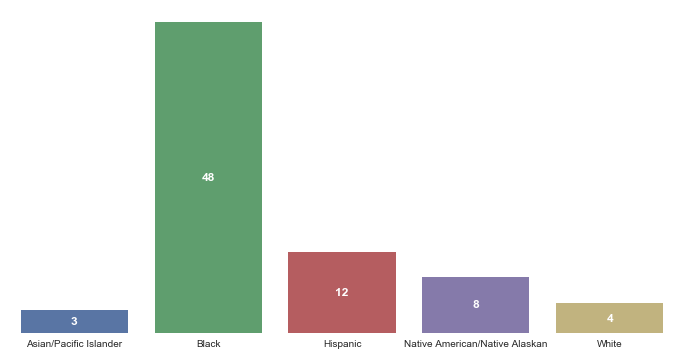

In [38]:
# Plotting the result
sns.set(style="white") #style
x = homicide_rate_per_hundredk.T[0].index
y = homicide_rate_per_hundredk.T[0].values

fig, ax = plt.subplots(figsize=(12,6)) #set the size of the figure

rect = sns.barplot(x, y) #barplot

#gestion des annotations 
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, int(p.get_height()), color="w", fontweight="bold", ha="center", va="center")

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_yticks([]) 
ax.set_ylabel("")

sns.despine(left=True, bottom=True)

    It seems like the black population have a bigger homicide rate per 100 000 than the other comunities. It appears that gun related homicides in the US impact racial categories differently.

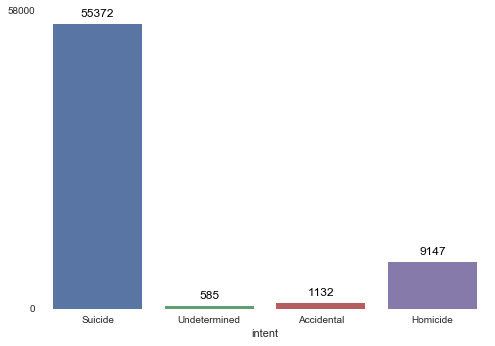

In [39]:
# subset the white
thewhites = guns[guns["race"]=="White"]
# plotting the result
MakeMyGraph(data=thewhites, col="intent", annotation="top", addtop=2000, rot=0, ymax=58000)

Gun's Suicide is the main reason of guns deaths for white racial categorie. That's explain the high rate we have seen before.